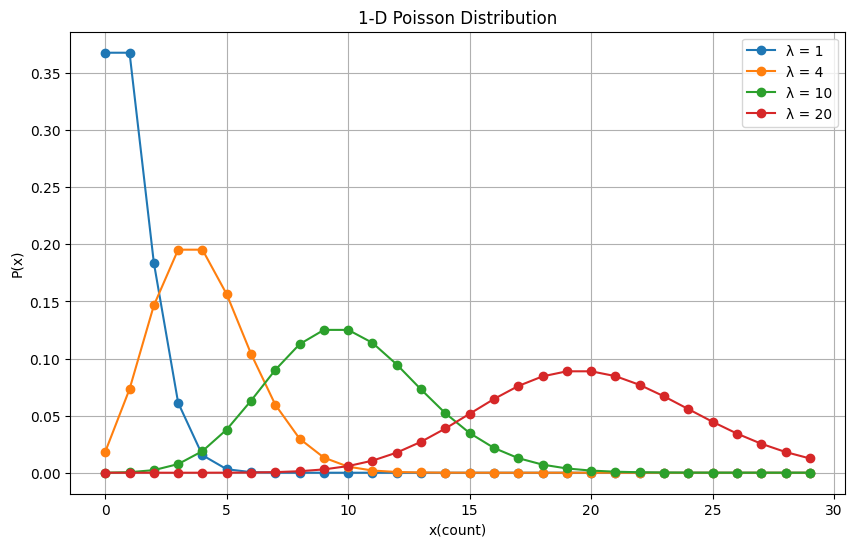

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

lambdas = [1, 4, 10, 20]
x = np.arange(0, 30)

plt.figure(figsize=(10, 6))
for lam in lambdas:
    plt.plot(x, poisson.pmf(x, mu=lam), marker='o', label=f"λ = {lam}")

plt.title("1-D Poisson Distribution")
plt.xlabel("x(count)")
plt.ylabel("P(x)")
plt.grid(True)
plt.legend()
plt.show()

51 日間の地震件数: date
2024-06-06    1
2024-06-16    2
2024-06-23    1
2024-07-04    1
2024-07-16    2
2024-07-18    1
2024-07-25    1
2024-07-30    1
2024-08-05    1
2024-08-13    1
2024-08-23    1
2024-08-27    1
2024-09-12    1
2024-09-15    1
2024-09-19    1
2024-10-02    1
2024-10-12    1
2024-10-14    1
2024-10-16    1
2024-10-20    1
2024-10-22    1
2024-10-30    1
2024-11-01    1
2024-11-03    1
2024-11-04    1
2024-11-12    1
2024-11-13    2
2024-11-15    2
2024-11-27    1
2024-12-04    1
2024-12-07    1
2024-12-09    1
2024-12-15    1
2024-12-16    1
2024-12-17    1
2024-12-27    1
2025-01-08    1
2025-01-10    1
2025-01-24    1
2025-02-11    1
2025-02-25    1
2025-03-04    1
2025-03-27    1
2025-03-29    1
2025-04-01    1
2025-04-07    1
2025-04-20    1
2025-04-21    1
2025-05-04    2
2025-05-12    1
2025-05-26    1
Name: count, dtype: int64
推定されたλ（地震件数/日）: 1.10
平均 = 1.0980392156862746
分散 = 0.09019607843137255


/tmp/ipykernel_1271139/201401666.py:37: UserWarning: Glyph 35251 (\N{CJK UNIFIED IDEOGRAPH-89B3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1271139/201401666.py:37: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1271139/201401666.py:37: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1271139/201401666.py:37: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1271139/201401666.py:37: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1271139/201401666.py:37: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1271139/201401666.py:37: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOG

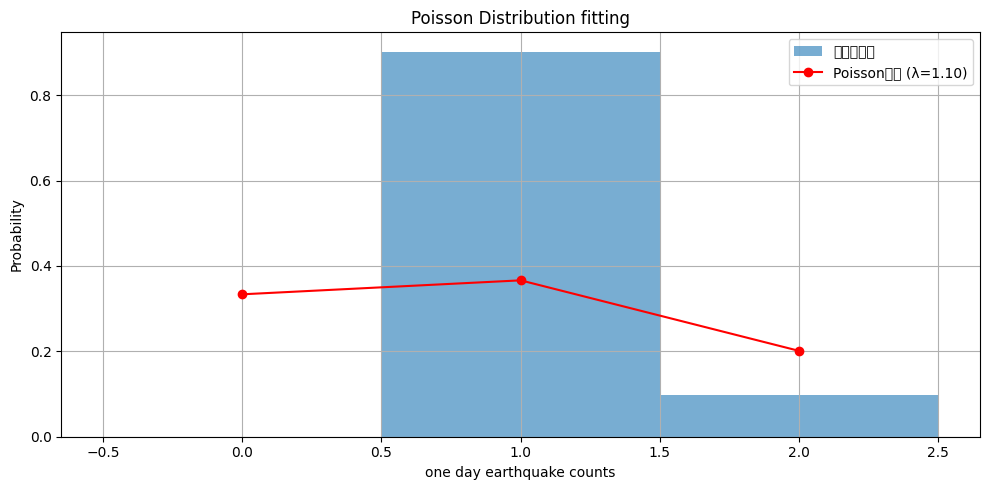

In [9]:
# 必要なライブラリ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# 1. CSVファイルの読み込み
df = pd.read_csv("earthquick.csv")  # ← ダウンロードしたUSGS地震データのCSV

# 2. 地震の発生日を抽出して、1日ごとの件数をカウント
df["time"] = pd.to_datetime(df["time"])         # 時刻をdatetimeに変換
df["date"] = df["time"].dt.date                 # 日付だけ抽出
daily_counts = df["date"].value_counts().sort_index()  # 各日ごとの地震件数
print(len(daily_counts), "日間の地震件数:", daily_counts)

# 3. 最尤推定: λ（1日の平均地震数）
lambda_hat = daily_counts.mean()
print(f"推定されたλ（地震件数/日）: {lambda_hat:.2f}")

print("平均 =", daily_counts.mean())
print("分散 =", daily_counts.var())

# 4. ヒストグラムとPoisson分布の重ね描き
x = np.arange(0, daily_counts.max() + 1)
pmf = poisson.pmf(x, mu=lambda_hat)  # Poissonの理論分布

plt.figure(figsize=(10, 5))
plt.hist(daily_counts, bins=np.arange(daily_counts.max()+2)-0.5,
         density=True, alpha=0.6, label="観測データ")
plt.plot(x, pmf, marker='o', linestyle='-', color='red',
         label=f"Poisson分布 (λ={lambda_hat:.2f})")
plt.xlabel("one day earthquake counts")
plt.ylabel("Probability")
plt.title("Poisson Distribution fitting")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


最尤推定された λ = 7.35


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30906 (\N{CJK UNIFIED IDEOGRAPH-78BA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRAPH-5143}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12509 (\N{KATAKANA LETTER PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_f

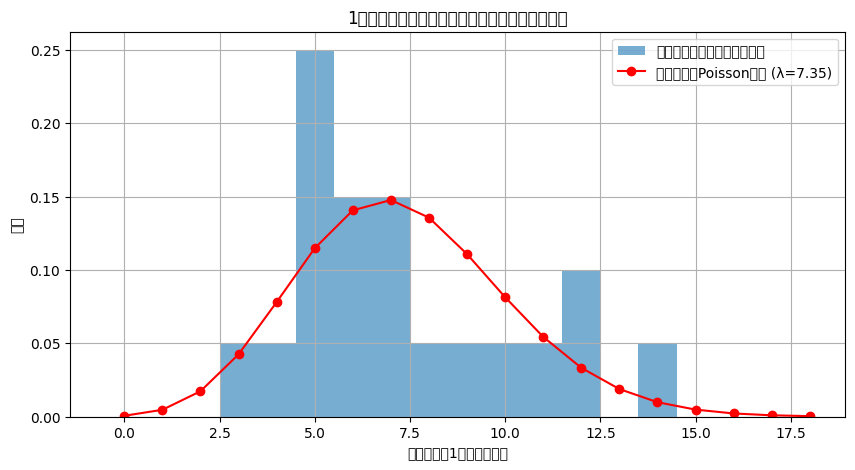

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# 擬似データ生成（λ=7で20サンプル）
np.random.seed(0)
data = np.random.poisson(lam=7, size=20)

# 最尤推定（平均がそのままλ）
lambda_hat = np.mean(data)
print(f"最尤推定された λ = {lambda_hat:.2f}")

# 可視化
x = np.arange(0, max(data) + 5)
pmf = poisson.pmf(x, mu=lambda_hat)

plt.figure(figsize=(10, 5))
plt.hist(data, bins=np.arange(0, max(data)+2)-0.5, density=True, alpha=0.6, label='観測データ（ヒストグラム）')
plt.plot(x, pmf, marker='o', linestyle='-', color='red', label=f'推定されたPoisson分布 (λ={lambda_hat:.2f})')
plt.xlabel('着信件数（1時間あたり）')
plt.ylabel('確率')
plt.title('1次元ポアソン分布の最尤推定とフィッティング')
plt.grid(True)
plt.legend()
plt.show()


51 日間の地震件数: date
2024-06-06    1
2024-06-16    2
2024-06-23    1
2024-07-04    1
2024-07-16    2
Name: count, dtype: int64

推定された λ（地震件数/日）: 1.10
平均 = 1.10
分散 = 0.09


/tmp/ipykernel_1271139/2318823388.py:39: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1271139/2318823388.py:39: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1271139/2318823388.py:39: UserWarning: Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1271139/2318823388.py:39: UserWarning: Glyph 38663 (\N{CJK UNIFIED IDEOGRAPH-9707}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1271139/2318823388.py:39: UserWarning: Glyph 20214 (\N{CJK UNIFIED IDEOGRAPH-4EF6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1271139/2318823388.py:39: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1271139/2318823388.py:39: UserWarning: Glyph 30906 (\N{CJK UNIFIED ID

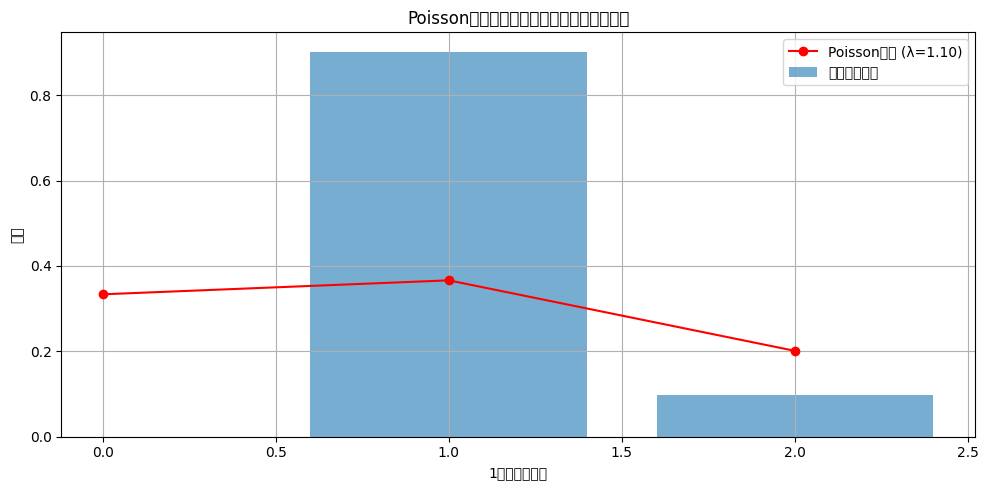

In [10]:
# 必要なライブラリ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# 1. CSVファイルの読み込み
df = pd.read_csv("earthquick.csv")  # ダウンロードしたUSGSの地震データCSV

# 2. 1日ごとの地震件数をカウント
df["time"] = pd.to_datetime(df["time"])   # 文字列→日時型
df["date"] = df["time"].dt.date           # 日付のみ抽出
daily_counts = df["date"].value_counts().sort_index()  # 各日あたりの件数
print(len(daily_counts), "日間の地震件数:", daily_counts.head())

# 3. Poisson分布の最尤推定（λ = 平均）
lambda_hat = daily_counts.mean()
print(f"\n推定された λ（地震件数/日）: {lambda_hat:.2f}")
print(f"平均 = {lambda_hat:.2f}")
print(f"分散 = {daily_counts.var():.2f}")

# 4. 可視化用に観測相対頻度（経験分布）を作成
count_freq = daily_counts.value_counts().sort_index()
rel_freq = count_freq / count_freq.sum()  # 相対頻度（＝確率）

# 5. Poisson理論分布のPMF計算
x = np.arange(0, count_freq.index.max() + 1)
pmf = poisson.pmf(x, mu=lambda_hat)

# 6. 描画（観測 vs 理論）
plt.figure(figsize=(10, 5))
plt.bar(rel_freq.index, rel_freq.values, alpha=0.6, label="観測相対頻度")
plt.plot(x, pmf, marker='o', color='red', label=f"Poisson分布 (λ={lambda_hat:.2f})")
plt.xlabel("1日の地震件数")
plt.ylabel("確率")
plt.title("Poisson分布の最尤推定と経験分布との比較")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not

510 日間の地震件数: date
2015-06-08    1
2015-06-10    1
2015-06-16    1
2015-06-17    1
2015-07-05    1
Name: count, dtype: int64

推定された λ（地震件数/日）: 1.14
平均 = 1.14
分散 = 0.28


findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'TakaoPGothic' not

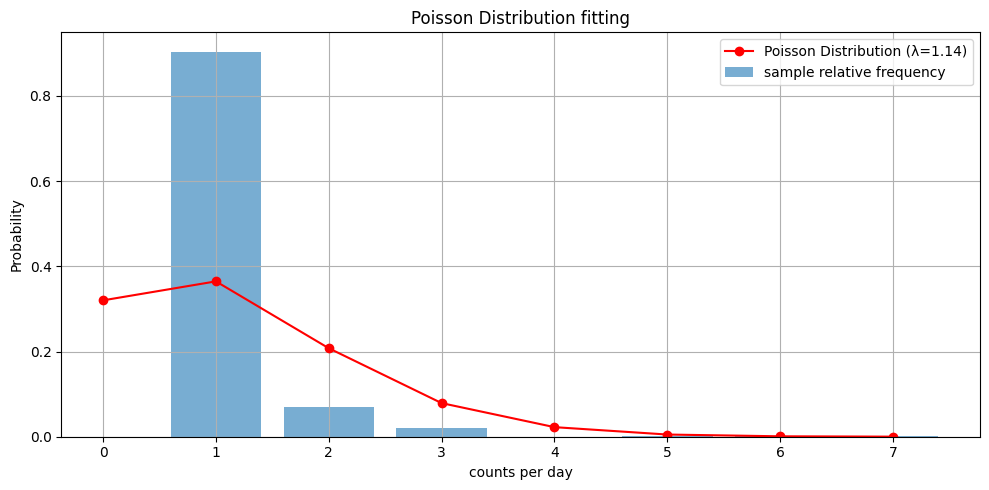

In [17]:
# 必要なライブラリ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# 1. CSVファイルの読み込み
df = pd.read_csv("earthquick_v2.csv")  # ダウンロードしたUSGSの地震データCSV

# 2. 1日ごとの地震件数をカウント
df["time"] = pd.to_datetime(df["time"])   # 文字列→日時型
df["date"] = df["time"].dt.date           # 日付のみ抽出
daily_counts = df["date"].value_counts().sort_index()  # 各日あたりの件数
print(len(daily_counts), "日間の地震件数:", daily_counts.head())

# 3. Poisson分布の最尤推定（λ = 平均）
lambda_hat = daily_counts.mean()
print(f"\n推定された λ（地震件数/日）: {lambda_hat:.2f}")
print(f"平均 = {lambda_hat:.2f}")
print(f"分散 = {daily_counts.var():.2f}")

# 4. 可視化用に観測相対頻度（経験分布）を作成
count_freq = daily_counts.value_counts().sort_index()
rel_freq = count_freq / count_freq.sum()  # 相対頻度（＝確率）

# 5. Poisson理論分布のPMF計算
x = np.arange(0, count_freq.index.max() + 1)
pmf = poisson.pmf(x, mu=lambda_hat)

# 6. 描画（観測 vs 理論）
plt.figure(figsize=(10, 5))
plt.bar(rel_freq.index, rel_freq.values, alpha=0.6, label="sample relative frequency")
plt.plot(x, pmf, marker='o', color='red', label=f"Poisson Distribution (λ={lambda_hat:.2f})")
plt.xlabel("counts per day")
plt.ylabel("Probability")
plt.title("Poisson Distribution fitting")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
